In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
#import dataset
df=pd.read_csv("diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
#load first 5 rows
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [7]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
df.duplicated().sum()

np.int64(146)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.select_dtypes([int,float])


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
print("Median",df["carat"].median())
df["carat"].describe()

Median 0.7


count    53794.00000
mean         0.79778
std          0.47339
min          0.20000
25%          0.40000
50%          0.70000
75%          1.04000
max          5.01000
Name: carat, dtype: float64

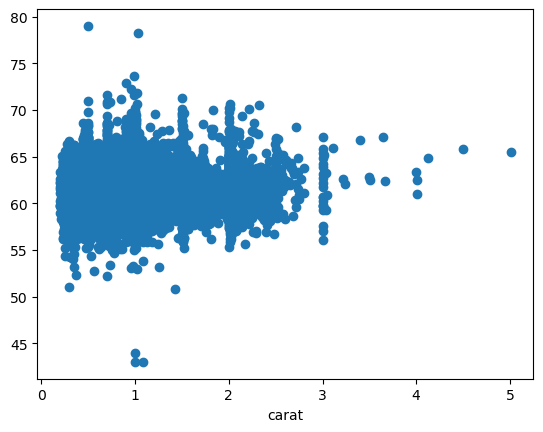

In [12]:
plt.scatter(df["carat"],df["depth"])
plt.xlabel("carat")
plt.show()

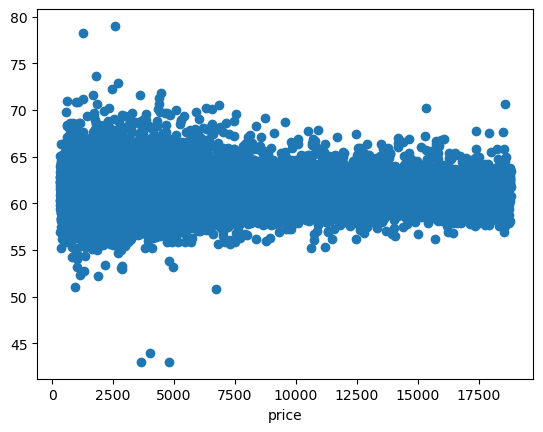

In [13]:
plt.scatter(df["price"],df["depth"])
plt.xlabel("price")
plt.show()

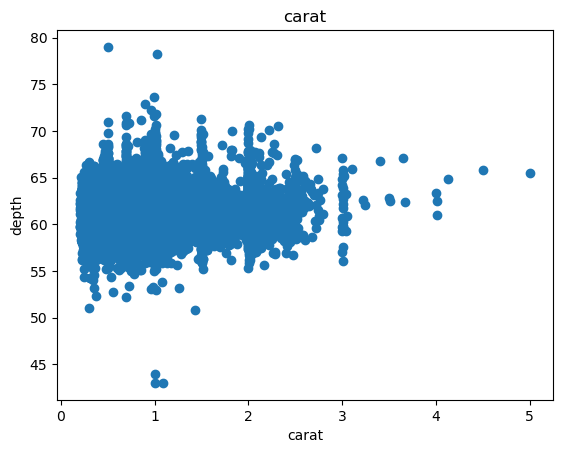

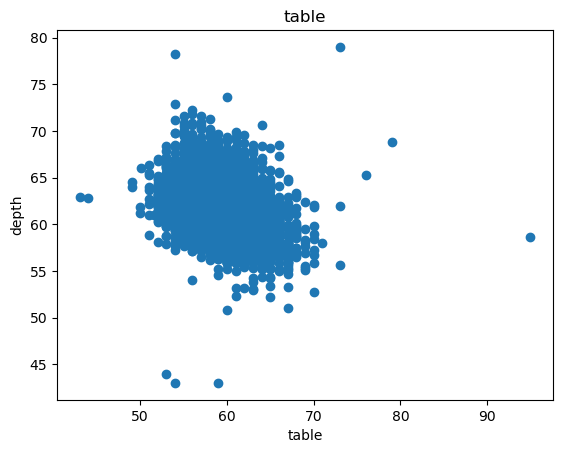

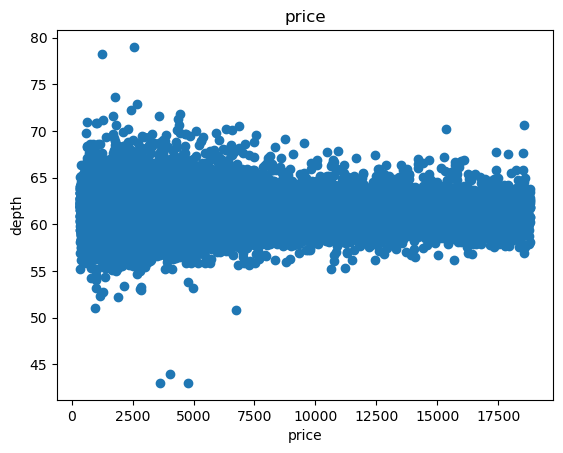

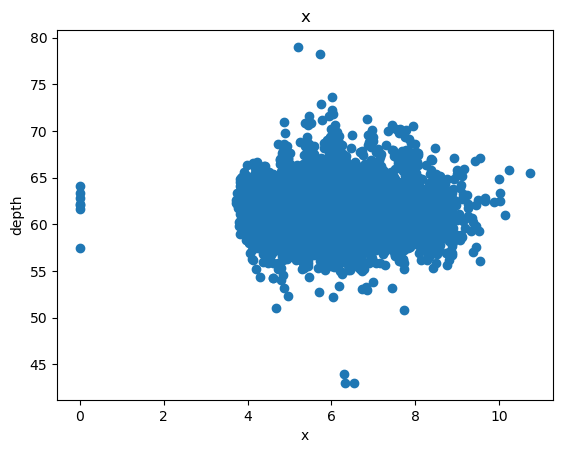

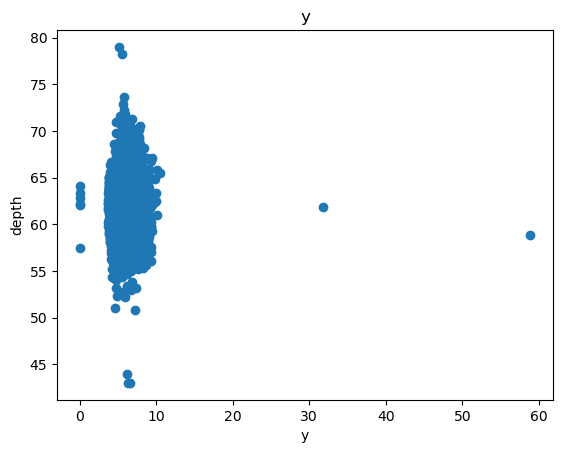

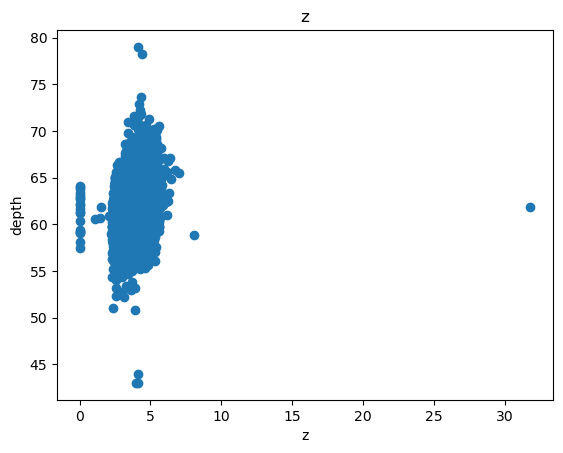

In [14]:
for i in df.select_dtypes([int,float]).columns:
    if i!="depth":
        plt.scatter(df[i],df["depth"])
        plt.xlabel(i)
        plt.ylabel("depth")
        plt.title(i)
        plt.show()

In [15]:
df.drop(columns="depth",inplace=True)

In [16]:
df

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


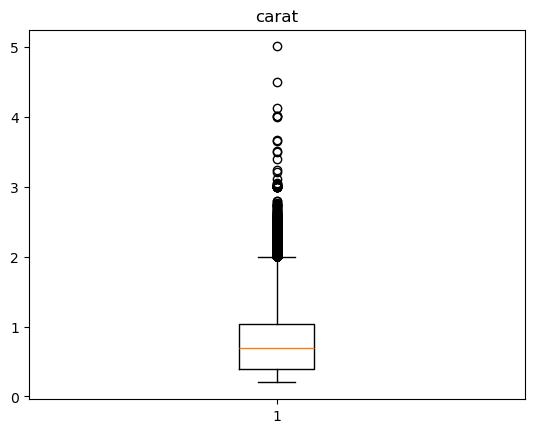

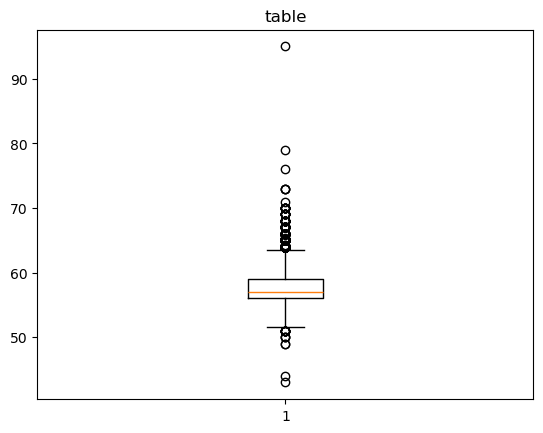

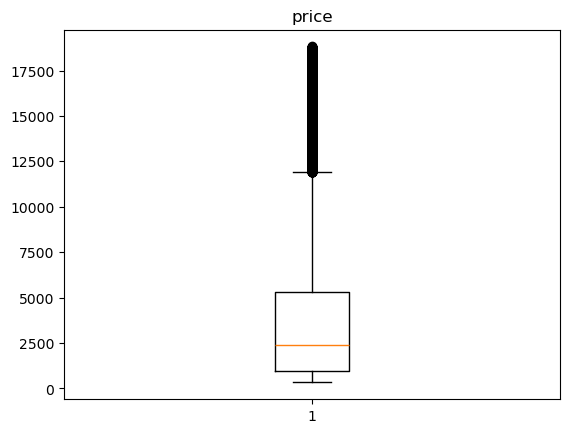

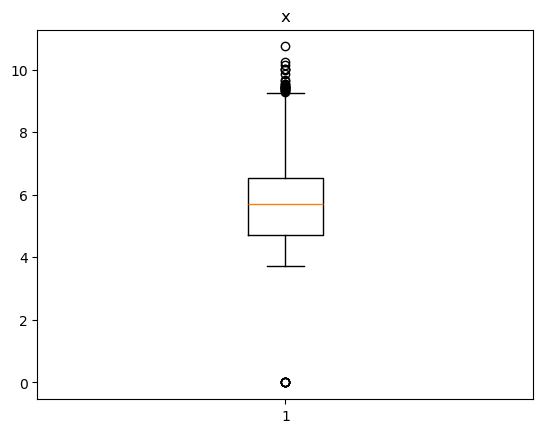

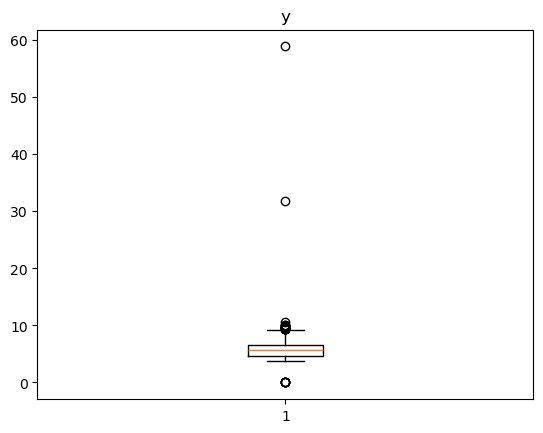

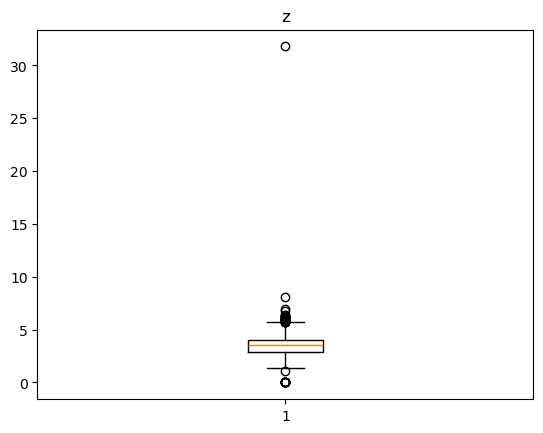

In [17]:
for i in df.select_dtypes([float,int]).columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    

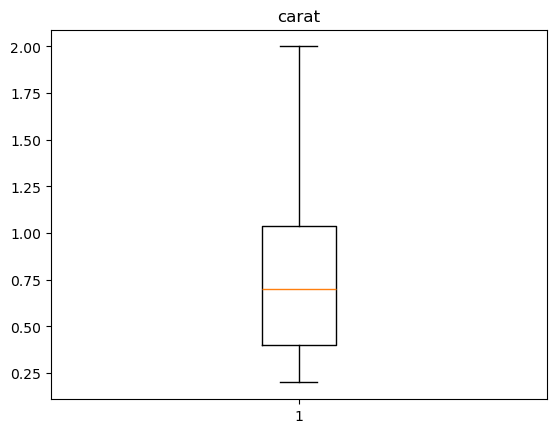

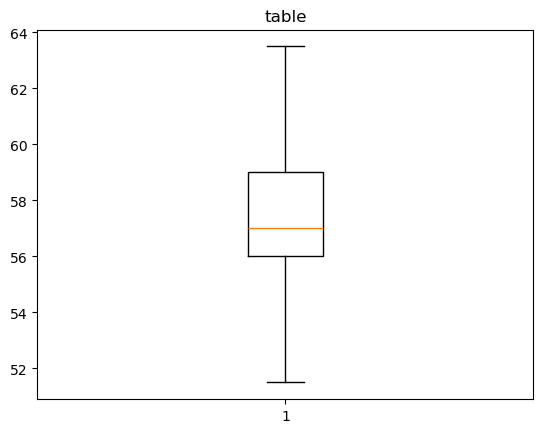

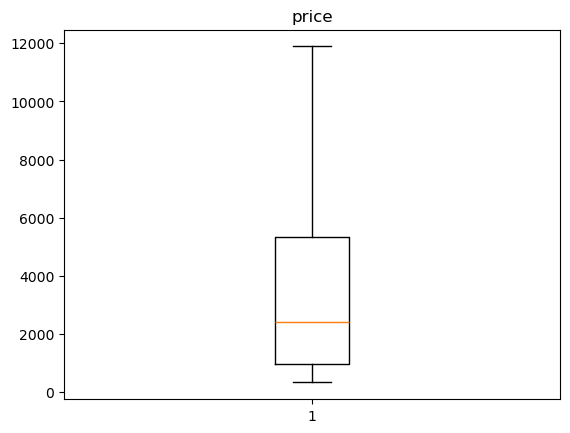

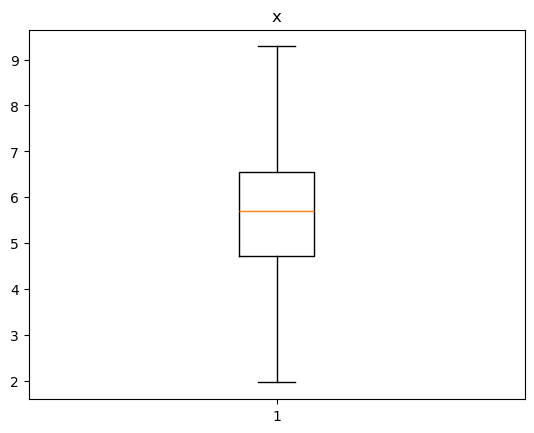

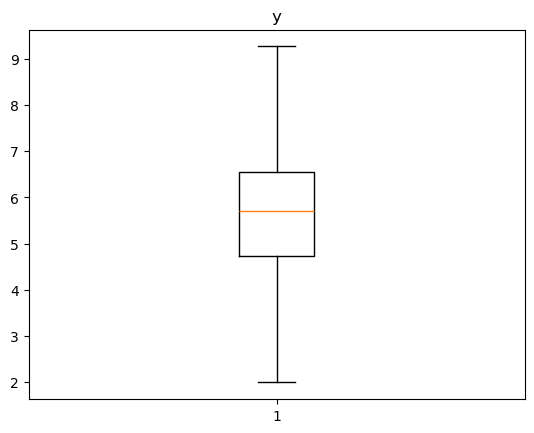

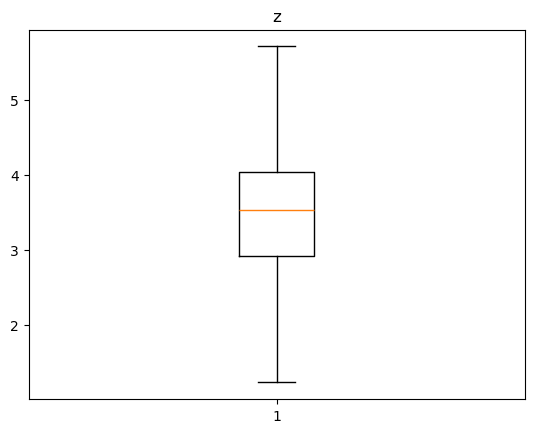

In [18]:
for i in df.select_dtypes([int,float]).columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    df[i]=np.where(df[i]<lf,lf,df[i])
    df[i]=np.where(df[i]>uf,uf,df[i])
for i in df.select_dtypes([float,int]).columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    

In [19]:
%pip install seaborn

In [20]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

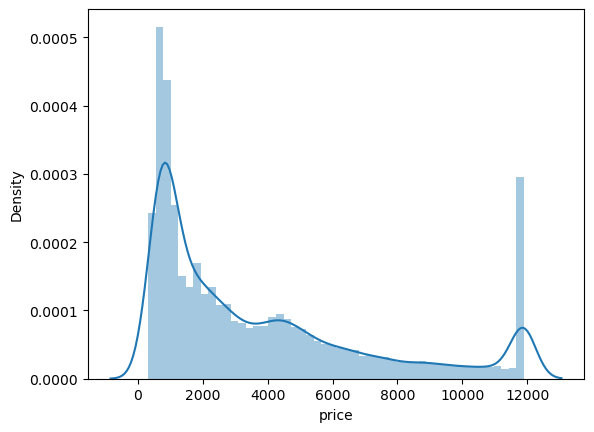

In [21]:
sns.distplot(df["price"])
plt.show()

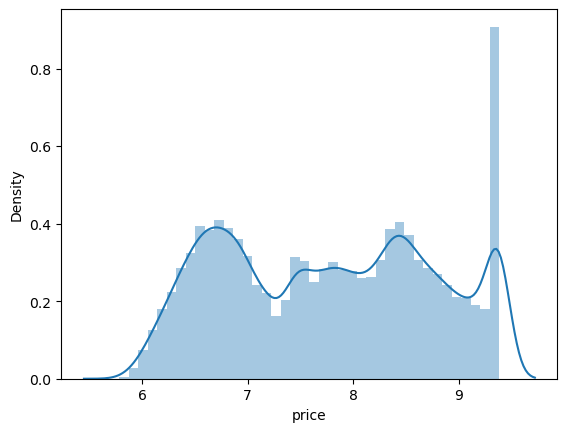

In [22]:
sns.distplot(np.log(df["price"]))
plt.show()

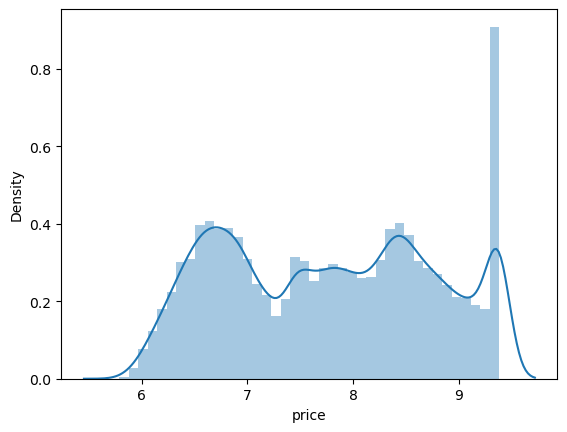

In [23]:
sns.distplot(np.log1p(df["price"]))
plt.show()

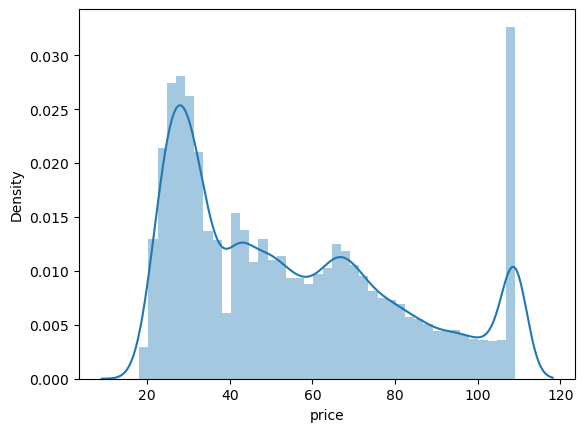

In [24]:
sns.distplot(np.sqrt(df["price"]))
plt.show()

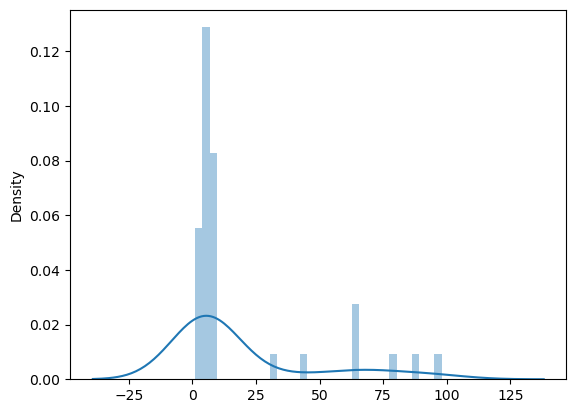

In [25]:
# example
p=[1,4,5,7,4,5,2,3,6,5,6,8,4,7,8,7,5,4,3,9,9,8,7,65,4,3,3,6,6,89,98,64,6,78,33,45,65]
sns.distplot(p)
plt.show()

In [26]:
df["price"]=np.log1p(df["price"])

In [27]:
df1=pd.get_dummies(df,columns=["clarity","color","cut"],drop_first=True)

In [28]:
df1

,carat,table,price,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,55.0,5.789960,3.95,3.98,2.43,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
1,0.21,61.0,5.789960,3.89,3.84,2.31,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,0.23,63.5,5.793014,4.05,4.07,2.31,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
3,0.29,58.0,5.814131,4.20,4.23,2.63,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.31,58.0,5.817111,4.34,4.35,2.75,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,57.0,7.922261,5.75,5.76,3.50,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
53936,0.72,55.0,7.922261,5.69,5.75,3.61,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
53937,0.70,60.0,7.922261,5.66,5.68,3.56,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
53938,0.86,58.0,7.922261,6.15,6.12,3.74,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [29]:
df.select_dtypes(object)

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [30]:
df["clarity"].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

In [31]:
df["cut"].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

In [32]:
df["color"].value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

In [33]:
x=df1.drop(columns="price")
y=df1["price"]

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=88)

In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Train r_square",lr.score(x_train,y_train))
print("Test r_square",lr.score(x_test,y_test))

Train r_square 0.9694518766413143
Test r_square 0.9623364499801595


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error


In [38]:
print("MSE",mean_squared_error(y_train,lr.predict(x_train)))
print("RMSE",root_mean_squared_error(y_train,lr.predict(x_train)))

MSE 0.029859793055424796
RMSE 0.1727998641649489


In [39]:
print("MSE",mean_squared_error(y_test,lr.predict(x_test)))
print("RMSE",root_mean_squared_error(y_test,lr.predict(x_test)))

MSE 0.036812884953752754
RMSE 0.1918668417255904


In [40]:
actual=y_train
pred=lr.predict(x_train)


In [41]:
error=actual-pred
print("MSE",np.mean(np.square(error)))
print("RMSE",np.sqrt(np.mean(np.square(error))))

MSE 0.029859793055424796
RMSE 0.1727998641649489


In [42]:
actual=np.exp(y_train)
pred=np.exp(lr.predict(x_train))

In [43]:
pred

array([3206.55933014, 4825.7960021 , 1175.69808635, ..., 3530.56639778,
       1080.5649241 ,  878.52888255], shape=(37655,))

In [44]:
actual

4820      3705.000
11124     4939.000
37958     1008.000
29632      443.000
53726     2722.000
           ...    
42690     1338.000
24995    11891.375
2487      3196.000
36922      962.000
39323     1072.000
Name: price, Length: 37655, dtype: float64

In [45]:
error=actual-pred
print("MSE",np.mean(np.square(error)))
print("RMSE",np.sqrt(np.mean(np.square(error))))

MSE 2467949.445471294
RMSE 1570.970860796372


In [46]:
x_test

,carat,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
257,0.76,59.0,6.00,5.94,3.51,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
27173,1.55,55.0,7.38,7.43,4.63,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
50560,0.72,56.0,5.77,5.80,3.56,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45209,0.51,55.0,5.08,5.13,3.19,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
15632,1.01,60.0,6.39,6.29,4.00,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,0.70,57.0,5.78,5.84,3.50,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
37279,0.30,57.0,4.27,4.29,2.66,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
16187,1.01,61.0,6.47,6.32,3.92,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
49529,0.59,57.0,5.39,5.36,3.39,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [47]:
#Prediction
np.exp(y_train).head(5)

4820     3705.0
11124    4939.0
37958    1008.0
29632     443.0
53726    2722.0
Name: price, dtype: float64

In [48]:
np.exp(lr.predict(x_test))

array([ 3302.41804792, 13476.11846839,  2239.25255166, ...,
        6022.24996433,  1831.82258473,  2092.50190342], shape=(16139,))

In [49]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [50]:
dt.fit(x_train,y_train)
print("Train",dt.score(x_train,y_train))
print("Test",dt.score(x_test,y_test))

Train 0.9999860037620075
Test 0.9813252233816302


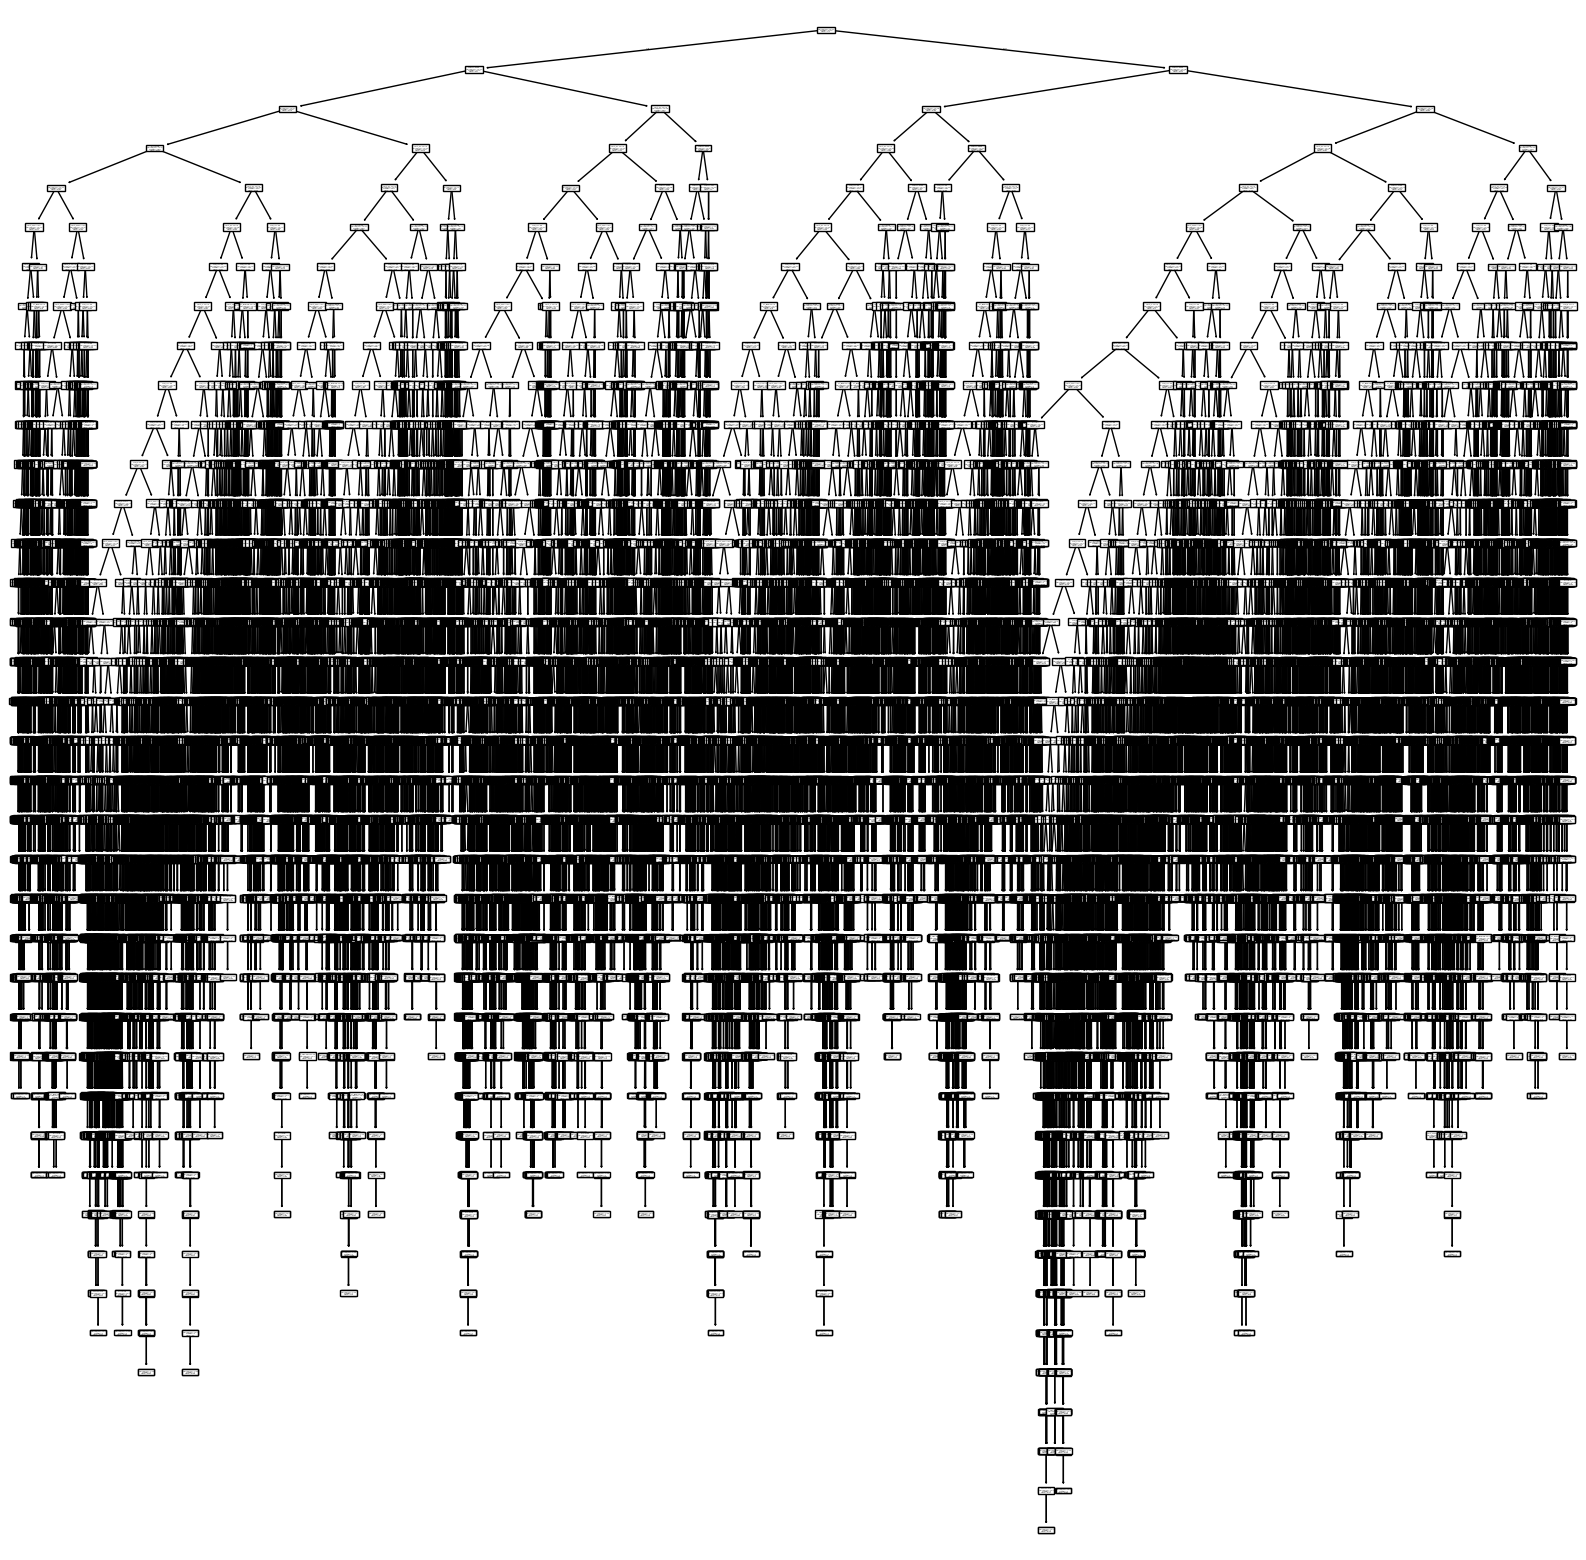

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dt,feature_names=x_train.columns)
plt.show()

In [52]:
#Prediction
#Prediction
np.exp(y_train).head(5)

4820     3705.0
11124    4939.0
37958    1008.0
29632     443.0
53726    2722.0
Name: price, dtype: float64